## my personal project 2

## P Shyam Kishore

In [1]:
#let import usefull libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt = pd.read_csv('C:\data_trained\Dataset2-main\Dataset2-main\diabetes.csv')
dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dt.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

#####   In our case outcome is the label and it is a classification model.lets deal with null values if present

In [4]:
dt.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
dt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



##### 1)no nan values. 2) some  features like glucose,,BP,skin_thickness,bmi,isulin have std is high,as we know that if  there is outliers then std is high
##### lets check the distribution 

In [6]:
dt.shape[1]

9

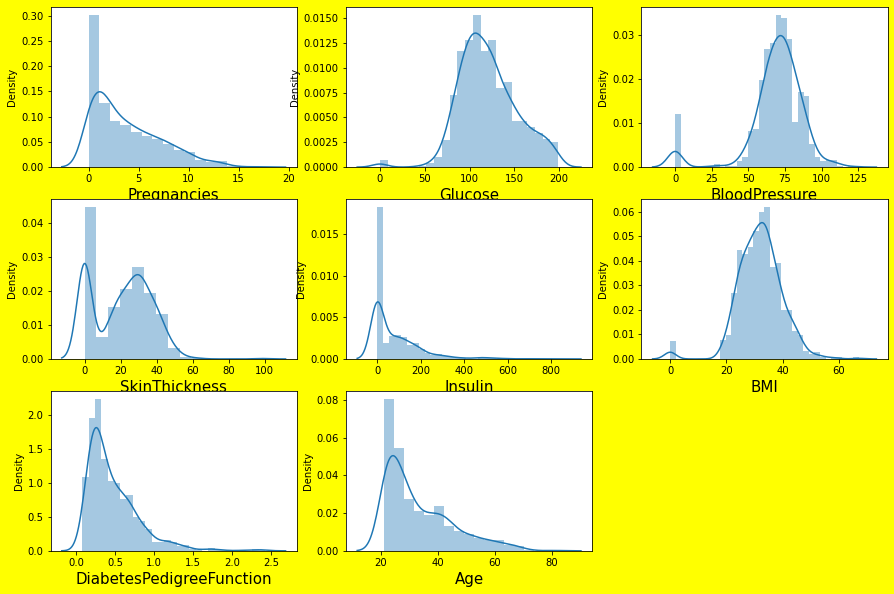

In [7]:
plt.figure(figsize=(15,10),facecolor='yellow')
plt_num = 1
for i in dt:
    if plt_num<=8:
        ax=plt.subplot(3,3,plt_num)
        sns.distplot(dt[i])
        plt.xlabel(i,fontsize=15)
    plt_num+=1
plt.show()

##### replacing 0 with the mean of the column

In [8]:
dt['BMI'].replace(0,dt['BMI'].mean(),inplace=True)
dt['BloodPressure'].replace(0,dt['BloodPressure'].mean(),inplace=True)
dt['Glucose'].replace(0,dt['Glucose'].mean(),inplace=True)
dt['SkinThickness'].replace(0,dt['SkinThickness'].mean(),inplace=True)
dt['Insulin'].replace(0,dt['Insulin'].mean(),inplace=True)

##### lets check ditribustion

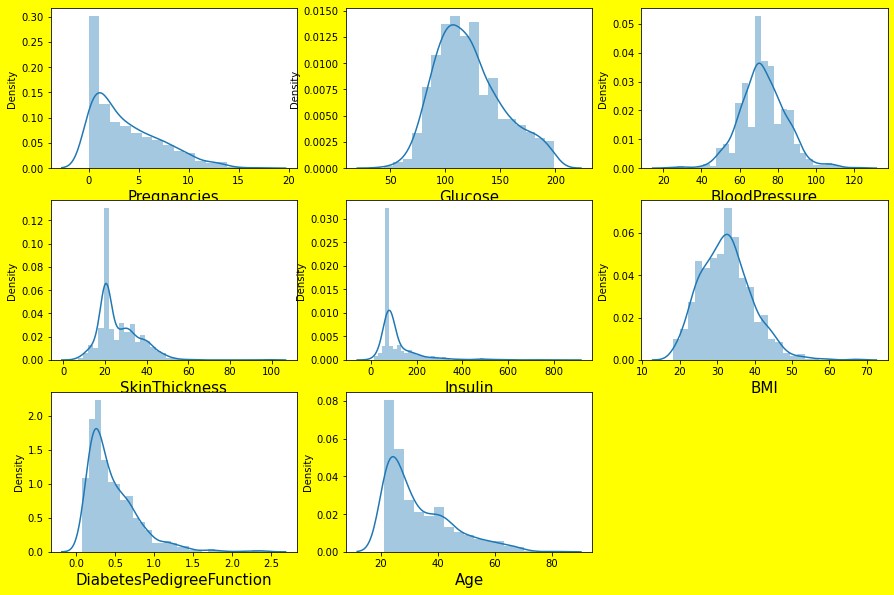

In [9]:
plt.figure(figsize=(15,10),facecolor='yellow')
plt_num = 1
for i in dt:
    if plt_num<=8:
        ax=plt.subplot(3,3,plt_num)
        sns.distplot(dt[i])
        plt.xlabel(i,fontsize=15)
    plt_num+=1
plt.show()

    #but still have outliers,lets deal with them 

In [10]:
#let assign the features to one variable
dt_ft=dt.drop('Outcome',axis=1)

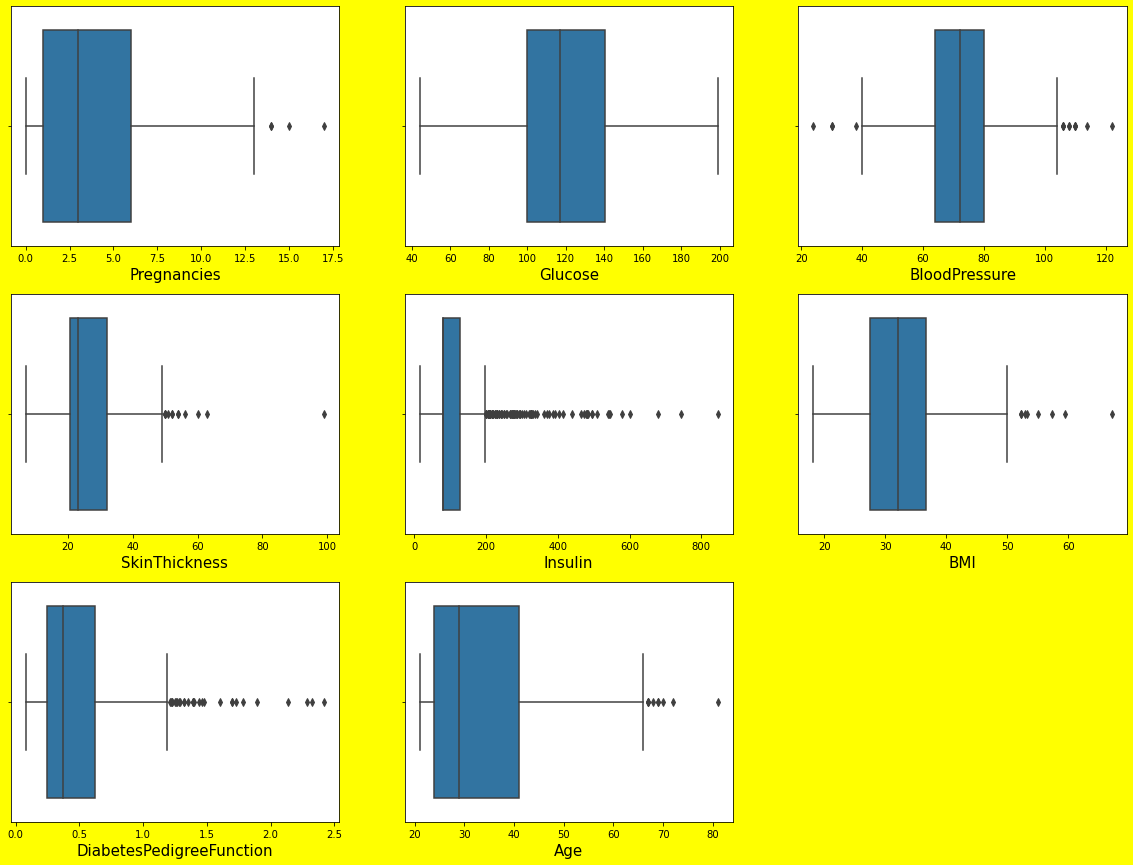

In [11]:
#visualize the outlies using box plot
plt.figure(figsize=(20,15),facecolor='yellow')
plt_num = 1
for i in dt_ft:
    if plt_num<=8:
        ax=plt.subplot(3,3,plt_num)
        sns.boxplot(dt_ft[i])
        plt.xlabel(i,fontsize=15)
    plt_num+=1
plt.show()

In [12]:
dt.shape

(768, 9)

In [13]:
#find IQR
#1st quantile
q1=dt.quantile(0.25)
#3rd quantile
q3 = dt.quantile(0.75)
iqr=q3-q1

In [14]:
dt.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### let drop outliers from one by one feature

In [15]:
#validating one outlier
pre_high = (q3.Pregnancies+1.5*iqr.Pregnancies)
index = np.where(dt['Pregnancies']>pre_high)
dt = dt.drop(dt.index[index])
dt.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [16]:
bp_high = (q3.BloodPressure+1.5*iqr.BloodPressure)
index = np.where(dt['BloodPressure']>bp_high)
dt = dt.drop(dt.index[index])
dt.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
sk_high = (q3.SkinThickness+1.5*iqr.SkinThickness)
index = np.where(dt['SkinThickness']>sk_high)
dt = dt.drop(dt.index[index])
dt.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [18]:
in_high = (q3.Insulin+1.5*iqr.Insulin)
index = np.where(dt['Insulin']>in_high)
dt = dt.drop(dt.index[index])
dt.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [19]:
bmi_high = (q3.BMI+1.5*iqr.BMI)
index = np.where(dt['BMI']>bmi_high)
dt = dt.drop(dt.index[index])
dt.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
dp_high = (q3.DiabetesPedigreeFunction+1.5*iqr.DiabetesPedigreeFunction)
index = np.where(dt['DiabetesPedigreeFunction']>dp_high)
dt = dt.drop(dt.index[index])
dt.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
age_high = (q3.Age+1.5*iqr.Age)
index = np.where(dt['Age']>age_high)
dt = dt.drop(dt.index[index])
dt.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [22]:
bp_low = (q3.BloodPressure-1.5*iqr.BloodPressure)
index = np.where(dt['BloodPressure']<bp_low)
dt = dt.drop(dt.index[index])
dt.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
572,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
573,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
574,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
575,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [25]:
dt.shape

(577, 9)

### I tried to drop Outliers lets check data again

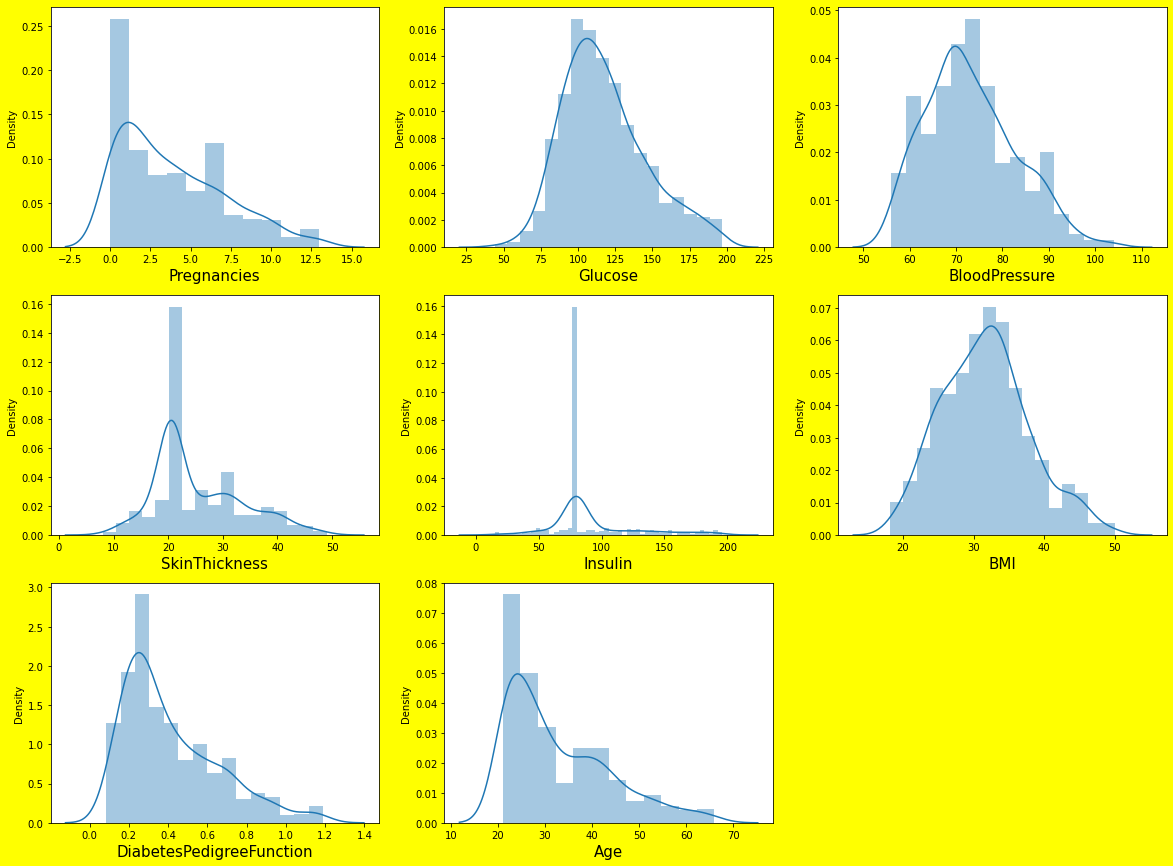

In [26]:
#visualize the outlies using box plot
plt.figure(figsize=(20,15),facecolor='yellow')
plt_num = 1
for i in dt:
    if plt_num<=8:
        ax=plt.subplot(3,3,plt_num)
        sns.distplot(dt[i])
        plt.xlabel(i,fontsize=15)
    plt_num+=1
plt.show()

### let check the relation between features and label

In [28]:
x=dt.drop(columns=['Outcome'])
y=dt['Outcome']

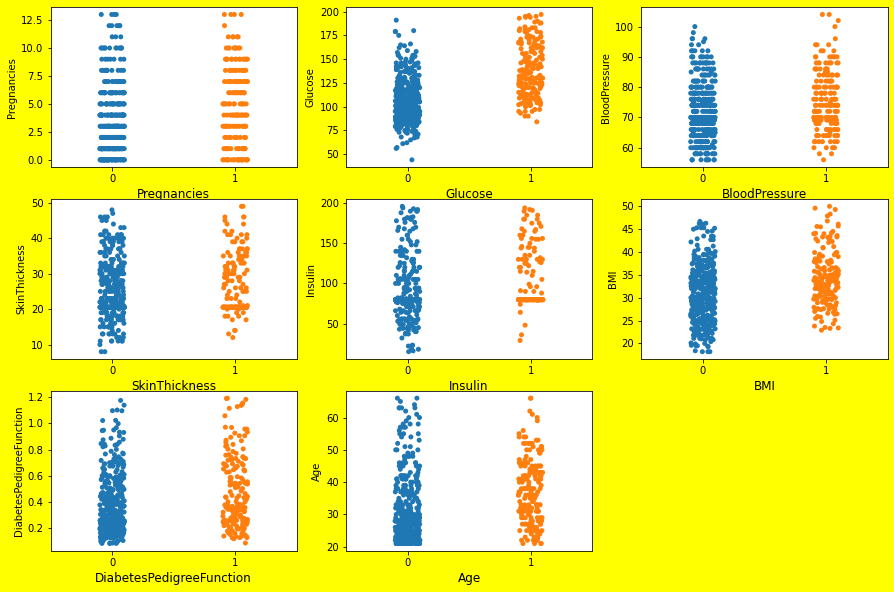

In [32]:
plt.figure(figsize=(15,10),facecolor='yellow')
plt_num = 1
for i in x:
    if plt_num<=9:
        ax=plt.subplot(3,3,plt_num)
        sns.stripplot(y,x[i])
        plt.xlabel(i,fontsize=12)
    plt_num+=1
plt.show()

In [34]:
dt.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.147760,0.182339,0.075832,-0.003129,0.048112,0.014627,0.558445,0.209717
Glucose,0.147760,1.000000,0.244465,0.014913,0.284855,0.156260,0.051708,0.286557,0.491606
BloodPressure,0.182339,0.244465,1.000000,0.105064,-0.005097,0.253697,0.033138,0.353743,0.173720
SkinThickness,0.075832,0.014913,0.105064,1.000000,0.211654,0.481973,0.080117,0.033647,0.091650
Insulin,-0.003129,0.284855,-0.005097,0.211654,1.000000,0.115800,0.144905,0.069941,0.143332
BMI,0.048112,0.156260,0.253697,0.481973,0.115800,1.000000,0.110889,0.068238,0.274351
DiabetesPedigreeFunction,0.014627,0.051708,0.033138,0.080117,0.144905,0.110889,1.000000,0.022850,0.179570
Age,0.558445,0.286557,0.353743,0.033647,0.069941,0.068238,0.022850,1.000000,0.259377
Outcome,0.209717,0.491606,0.173720,0.091650,0.143332,0.274351,0.179570,0.259377,1.000000


<AxesSubplot:>

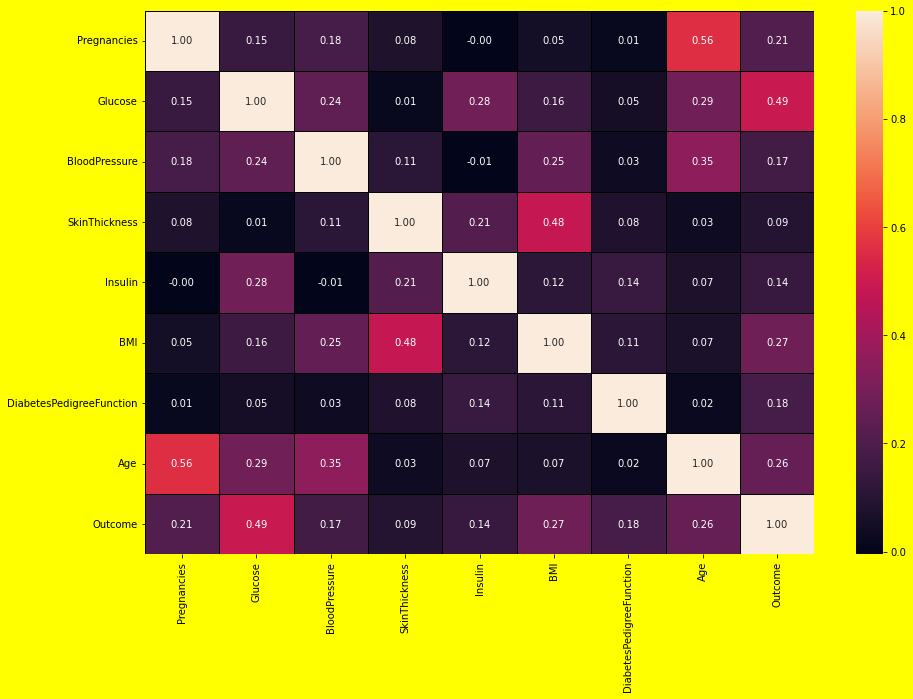

In [36]:
plt.figure(figsize=(15,10),facecolor='yellow')
sns.heatmap(dt.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

In [37]:
dt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,3.892548,117.825959,73.139481,25.378322,91.470415,31.722241,0.415586,32.880416,0.320624
std,3.276425,28.267326,9.708271,8.107466,33.546066,6.242026,0.245401,10.977783,0.467121
min,0.000000,44.000000,56.000000,8.000000,15.000000,18.200000,0.084000,21.000000,0.000000
25%,1.000000,98.000000,66.000000,20.536458,79.799479,27.300000,0.236000,24.000000,0.000000
50%,3.000000,113.000000,72.000000,20.536458,79.799479,31.900000,0.338000,29.000000,0.000000
75%,6.000000,134.000000,80.000000,31.000000,94.000000,35.400000,0.560000,40.000000,1.000000
max,13.000000,197.000000,104.000000,49.000000,196.000000,50.000000,1.191000,66.000000,1.000000


In [38]:
dt.skew()

Pregnancies                 0.769129
Glucose                     0.626835
BloodPressure               0.487118
SkinThickness               0.743845
Insulin                     1.316411
BMI                         0.327243
DiabetesPedigreeFunction    1.035458
Age                         0.987793
Outcome                     0.770678
dtype: float64

In [39]:
from scipy.stats import zscore
z = np.abs(zscore(x))
z.shape

(577, 8)

In [40]:
threshold = 3
print(np.where(z>3))

(array([108, 151, 161, 179, 284, 299, 326, 367, 371, 412, 440, 455, 555,
       560, 568], dtype=int64), array([6, 2, 7, 4, 4, 6, 2, 7, 4, 7, 6, 4, 6, 6, 7], dtype=int64))


In [43]:
dt1 = dt[(z<3).all(axis=1)]
print(x.shape)
print(x1.shape)

(577, 8)
(562, 8)


In [46]:
x=dt1.drop(columns=['Outcome'])
y=dt1['Outcome']

In [48]:
x.shape

(562, 8)

In [49]:
y.shape

(562,)

In [53]:
from sklearn.preprocessing import power_transform
x= power_transform(x,method='yeo-johnson')
x

array([[ 0.79734624,  1.13148974,  0.01013608, ...,  0.36049561,
         1.05843545,  1.40651808],
       [-0.87107632, -1.24821479, -0.69066955, ..., -0.79290563,
         0.02014207,  0.20473575],
       [ 1.20838929,  2.03242015, -0.94824286, ..., -1.40453234,
         1.1732203 ,  0.30907659],
       ...,
       [ 0.55873496,  0.27375875,  0.01013608, ..., -0.86434147,
        -0.63910077,  0.09196517],
       [-0.87107632,  0.44663501, -1.50516465, ..., -0.1951788 ,
         0.00953616,  1.28710193],
       [-0.87107632, -0.8589897 , -0.21231018, ..., -0.14602914,
        -0.18074729, -1.0427191 ]])

In [54]:
y.value_counts()

0    386
1    176
Name: Outcome, dtype: int64

In [55]:
#oversampling the data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [56]:
y.value_counts()

1    386
0    386
Name: Outcome, dtype: int64

### model bulding

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [58]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f'training data accoracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
              pred = clf.predict(x_test)
              print(f'test data accoracy score:{accuracy_score(y_test,pred)*100:.2f}%')
              print('\n confusion matrics \n',confusion_matrix(y_test,pred))
              print('\n classification report \n',classification_report(y_test,pred,digits=2))

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state =78)

In [60]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

training data accoracy score:100.00%
test data accoracy score:83.19%

 confusion matrics 
 [[95 24]
 [15 98]]

 classification report 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       119
           1       0.80      0.87      0.83       113

    accuracy                           0.83       232
   macro avg       0.83      0.83      0.83       232
weighted avg       0.83      0.83      0.83       232



In [62]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [63]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True)
metric_score(lr,x_train,x_test,y_train,y_test,train=False)

training data accoracy score:77.41%
test data accoracy score:80.60%

 confusion matrics 
 [[97 22]
 [23 90]]

 classification report 
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       119
           1       0.80      0.80      0.80       113

    accuracy                           0.81       232
   macro avg       0.81      0.81      0.81       232
weighted avg       0.81      0.81      0.81       232



In [64]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [65]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

training data accoracy score:87.04%
test data accoracy score:80.60%

 confusion matrics 
 [[93 26]
 [19 94]]

 classification report 
               precision    recall  f1-score   support

           0       0.83      0.78      0.81       119
           1       0.78      0.83      0.81       113

    accuracy                           0.81       232
   macro avg       0.81      0.81      0.81       232
weighted avg       0.81      0.81      0.81       232



In [66]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [67]:
metric_score(bc,x_train,x_test,y_train,y_test,train=True)
metric_score(bc,x_train,x_test,y_train,y_test,train=False)

training data accoracy score:99.26%
test data accoracy score:82.33%

 confusion matrics 
 [[97 22]
 [19 94]]

 classification report 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       119
           1       0.81      0.83      0.82       113

    accuracy                           0.82       232
   macro avg       0.82      0.82      0.82       232
weighted avg       0.82      0.82      0.82       232



In [68]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [69]:
metric_score(bc,x_train,x_test,y_train,y_test,train=True)
metric_score(bc,x_train,x_test,y_train,y_test,train=False)

training data accoracy score:99.26%
test data accoracy score:82.33%

 confusion matrics 
 [[97 22]
 [19 94]]

 classification report 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       119
           1       0.81      0.83      0.82       113

    accuracy                           0.82       232
   macro avg       0.82      0.82      0.82       232
weighted avg       0.82      0.82      0.82       232



In [70]:
#cross validation scores
from sklearn.model_selection import cross_val_score

In [71]:
def scores(clf,x,y):
    print(f'cross_validation scores for {clf} are {cross_val_score(clf,x,y)} \n mean of the scores is {cross_val_score(clf,x,y).mean()}\n','*'*50)

In [72]:
scores(rf,x,y)
scores(lr,x,y)
scores(ada,x,y)
scores(bc,x,y)
scores(et,x,y)

cross_validation scores for RandomForestClassifier() are [0.76774194 0.76774194 0.84415584 0.92207792 0.8961039 ] 
 mean of the scores is 0.8395643066610807
 **************************************************
cross_validation scores for LogisticRegression() are [0.75483871 0.74193548 0.7987013  0.85714286 0.81818182] 
 mean of the scores is 0.7941600335148723
 **************************************************
cross_validation scores for AdaBoostClassifier() are [0.77419355 0.71612903 0.81168831 0.88961039 0.80519481] 
 mean of the scores is 0.7993632174277335
 **************************************************
cross_validation scores for BaggingClassifier() are [0.7483871  0.76774194 0.82467532 0.87662338 0.86363636] 
 mean of the scores is 0.8020108923334728
 **************************************************
cross_validation scores for ExtraTreesClassifier() are [0.81290323 0.78709677 0.87012987 0.91558442 0.91558442] 
 mean of the scores is 0.8614997905320486
 *********************

In [73]:
accuracy = []
cvs = []
dif=[]
clfs = [rf,lr,ada,bc,et]
for i in clfs:
    i.fit(x_train,y_train)
    predi = i.predict(x_test)
    accuracy.append(accuracy_score(y_test,predi))
    cvs.append(cross_val_score(i,x,y).mean())
    dif.append(accuracy_score(y_test,predi)-cross_val_score(i,x,y).mean())
comparison = pd.DataFrame()
comparison['clasifier']=['rf','lr','ada','bc','et']
comparison['accuracy']=accuracy
comparison['cv_score']=cvs
comparison['difference']=dif
comparison

,clasifier,accuracy,cv_score,difference
0,rf,0.853448,0.843444,0.015174
1,lr,0.806034,0.794160,0.011874
2,ada,0.806034,0.799363,0.006671
3,bc,0.797414,0.811052,-0.016269
4,et,0.870690,0.853766,0.014326


In [74]:
#roc auc curve
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import roc_curve

In [75]:
Final_model = ExtraTreesClassifier()
Final_model.fit(x_train,y_train)


ExtraTreesClassifier()

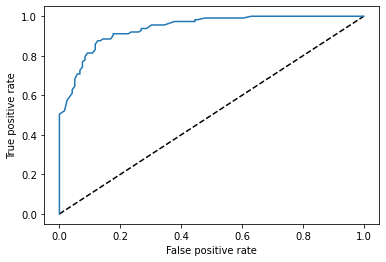

auc score : 
 0.8633152375994646


In [76]:
y_pred_prob = Final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
roc_auc = auc(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier(area = %0.2f)'%roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score = roc_auc_score(y_test,Final_model.predict(x_test))
print('auc score : \n',auc_score)

In [77]:
Final_model = AdaBoostClassifier()
Final_model.fit(x_train,y_train)


AdaBoostClassifier()

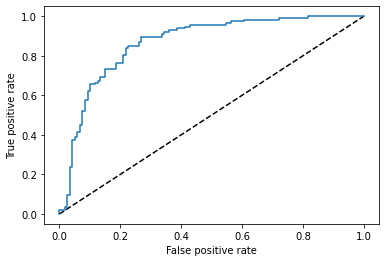

auc score : 
 0.8066855060608313


In [78]:
y_pred_prob = Final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
roc_auc = auc(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier(area = %0.2f)'%roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score = roc_auc_score(y_test,Final_model.predict(x_test))
print('auc score : \n',auc_score)

#  it seems ETClassifier has best accuracy score with 86.33%

In [80]:
#saving the model
import joblib
joblib.dump(Final_model,'diabetes.pkl')

['diabetes.pkl']

In [83]:
#pridicting the saved model
model2 = joblib.load('diabetes.pkl')
prediction = model2.predict(x_test)
prediction

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

# conclusion

In [84]:
a=np.array(y_test)
predicted = np.array(prediction)
df_conclusion = pd.DataFrame({'original':a,'predicted':predicted})
df_conclusion

,original,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
227,0,1
228,0,0
229,1,1
230,0,0


# Successfully achived 86% acuracy score using my model